# Uber Trips Analysis

<img src='uber.jpg'>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('uber.csv')

In [5]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [7]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [8]:
df.sample

<bound method NDFrame.sample of                   Date/Time      Lat      Lon    Base
0          9/1/2014 0:01:00  40.2201 -74.0021  B02512
1          9/1/2014 0:01:00  40.7500 -74.0027  B02512
2          9/1/2014 0:03:00  40.7559 -73.9864  B02512
3          9/1/2014 0:06:00  40.7450 -73.9889  B02512
4          9/1/2014 0:11:00  40.8145 -73.9444  B02512
...                     ...      ...      ...     ...
1028131  9/30/2014 22:57:00  40.7668 -73.9845  B02764
1028132  9/30/2014 22:57:00  40.6911 -74.1773  B02764
1028133  9/30/2014 22:58:00  40.8519 -73.9319  B02764
1028134  9/30/2014 22:58:00  40.7081 -74.0066  B02764
1028135  9/30/2014 22:58:00  40.7140 -73.9496  B02764

[1028136 rows x 4 columns]>

In [9]:
df.shape

(1028136, 4)

In [10]:
#pip install summarytool

In [11]:
from summarytools import dfSummary

In [12]:
dfSummary(df) #bu kodla artik EDA ya VEDA ediyoruz.

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date/Time[object],1. 9/13/2014 18:44:002. 9/13/2014 18:41:003. 9/13/2014 18:45:004. 9/18/2014 19:01:005. 9/27/2014 23:40:006. 9/13/2014 18:05:007. 9/13/2014 15:40:008. 9/19/2014 18:14:009. 9/18/2014 19:04:0010. 9/20/2014 18:47:0011. other,"82 (0.0%)80 (0.0%)78 (0.0%)78 (0.0%)75 (0.0%)75 (0.0%)75 (0.0%)74 (0.0%)74 (0.0%)74 (0.0%)1,027,371 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,Lat[float64],Mean (sd) : 40.7 (0.0)min < med < max:40.0 < 40.7 < 41.3IQR (CV) : 0.0 (997.8),"5,135 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAgpJREFUeJzt10Fu2kAYhuH564Q4qLJBTlmyZVGpB/AhctgcoQu2bLgBOyQTYcmxE2Om8qJSWzVqxg0iX/I+az7NLF4bMO+9A966T+e+APASFy/6FIKY2bVzbjRw/uS9r1/5SvII9QSRZll2myTJdMi+LMt7M7sj1t8R6usb9ZHmeV6nadqEDPf7fbxcLqdFUfRvY0L9BaGeSB/pbDZ7GDDtfzbgD/yZggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYSLc1/grTKza+fcaMA0OR6Plye40odGqM9EmmXZbZIk09Bt27Zx13Vfm6b57px7CN13XddHnpiZG+jJe1+7d4ZQ/27UR5rneZ2maRMy3Gw20/V6PT4cDlHooVVVXbZt+20+n0dRFAWd+1NZlvdmdvfeYv1nqGYWO+eu3MfSf33/10NcVVW83W7HIZvdbvc5juPxYrGwyWTyGHpmXddXq9XqS1EUN2ZWhu7P7NF7/+zD+QOu/22MCrD2GgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Lon[float64],Mean (sd) : -74.0 (0.1)min < med < max:-74.8 < -74.0 < -72.7IQR (CV) : 0.0 (-1268.5),"7,724 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAgZJREFUeJzt2sFu2kAURuG5xUkmobIFSGbHC0TqgiX7bvuweQgv+igIC9mCQGyZqVx1mVa1oY1/ON/+2rM4suwZWwjBAUP36aMXAPyNyF0pM3t0zt2fcYkqhHC44JJwhuhaI53NZt/iOJ70vUZZllszeyHWYbjKUNsnaRvparU6JEly7DpcFIXPsmyS53n7RCbUAbjWUH9qI03T9LXnePvqgIHgYwoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSoo9ewFA1TXPnnIvNrM94FUI4XH5Vt4tQ37Hf7+/quv6yWCxGo9Ho2HW+LMutmb0Q6+UQ6juqqoq890/L5fI4n8+3XWaLovBZlk3yPL93zhHqhRDqH4zH42Oapq89Rh//wXJuGh9TkECokECokECokECokECokECokDDofVQza/cj243zruLT6dQegeJWQjUz75x7cP+fn06nX5Mk+dx1sK5r3zTN82az+d7nxrvdzv86SvXr9fqp68lU0zTRGf8J3Kq3EMJvj6t/AAhkakbyYi5kAAAAAElFTkSuQmCC"">",0(0.0%)
4,Base[object],1. B026172. B025983. B026824. B027645. B02512,"377,695 (36.7%)240,600 (23.4%)197,138 (19.2%)178,333 (17.3%)34,370 (3.3%)","<

In [13]:
#pip install dtale

In [38]:
import dtale
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [40]:
#pip install --upgrade dtale pandas

In [42]:
d=dtale.show(df)
d.open_browser

<bound method DtaleData.open_browser of >

In [44]:
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime) 

In [46]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [52]:
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)

In [54]:
df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Day', ylabel='Count'>

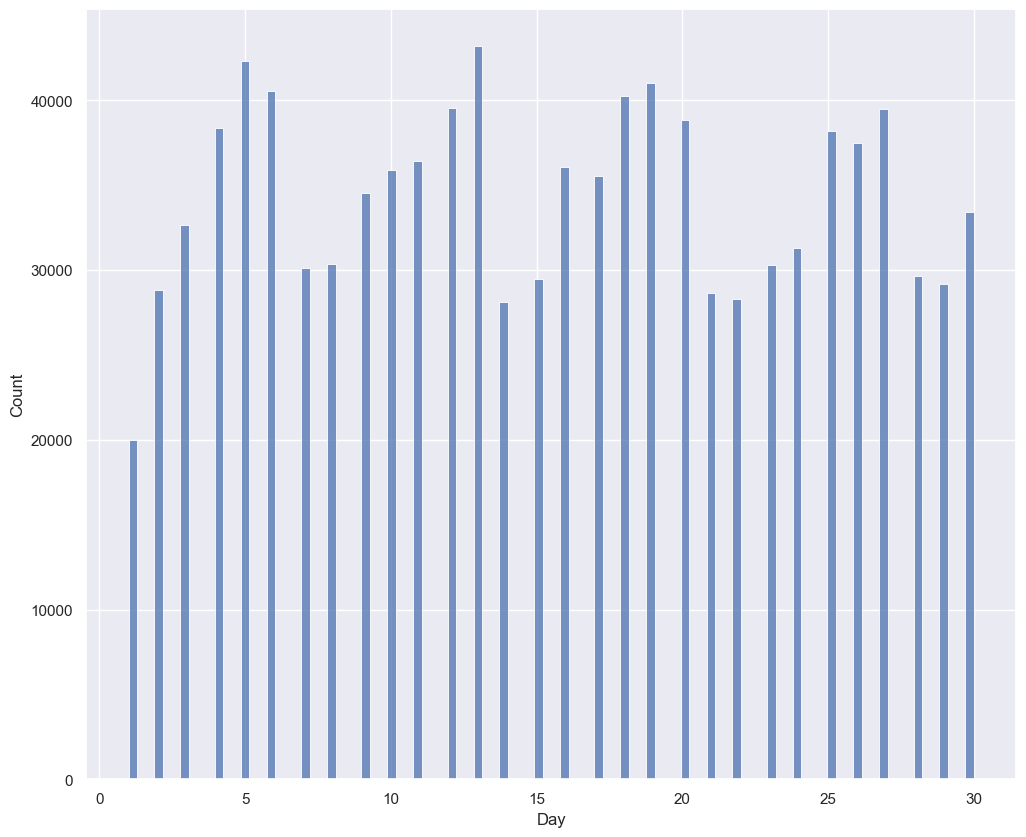

In [68]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.histplot(df["Day"])

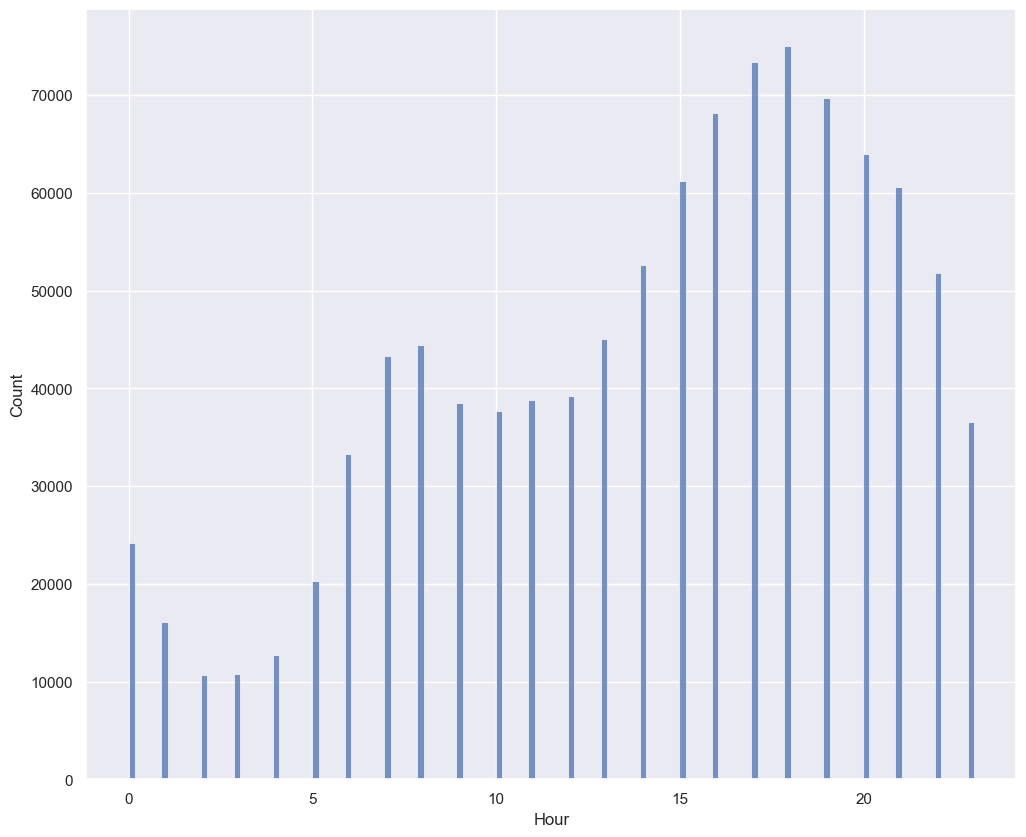

In [72]:
sns.histplot(df["Hour"]);

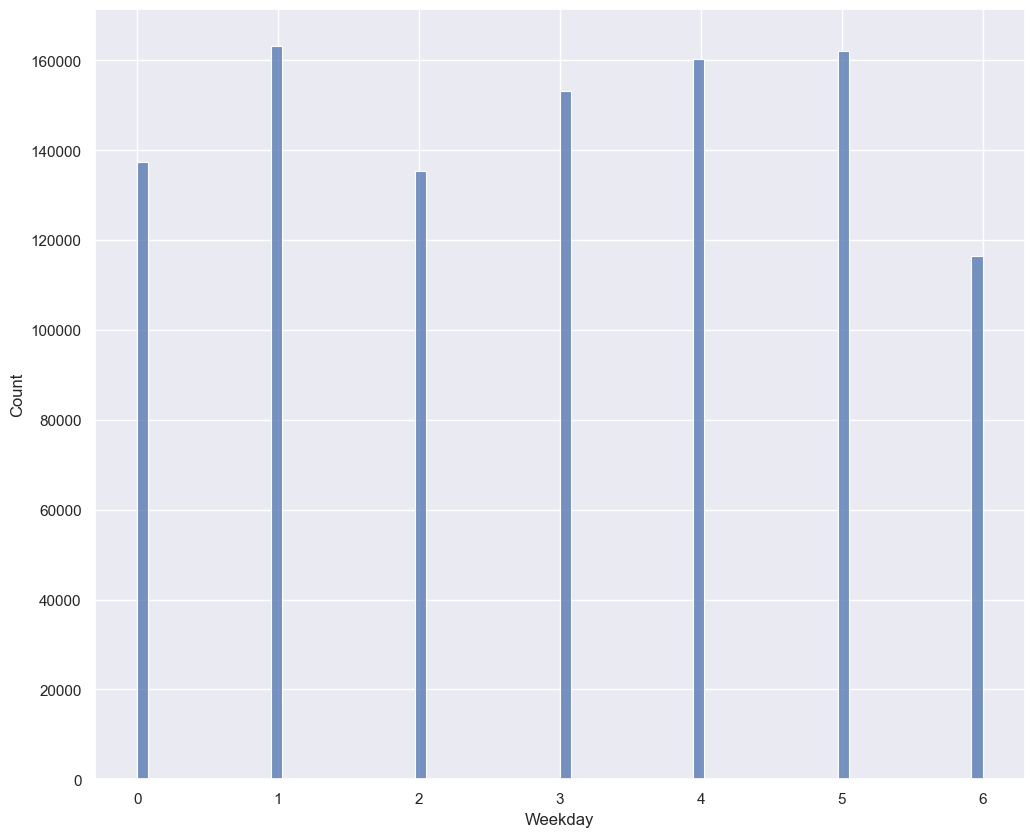

In [74]:
sns.histplot(df["Weekday"]);

<Axes: xlabel='Hour', ylabel='Weekday'>

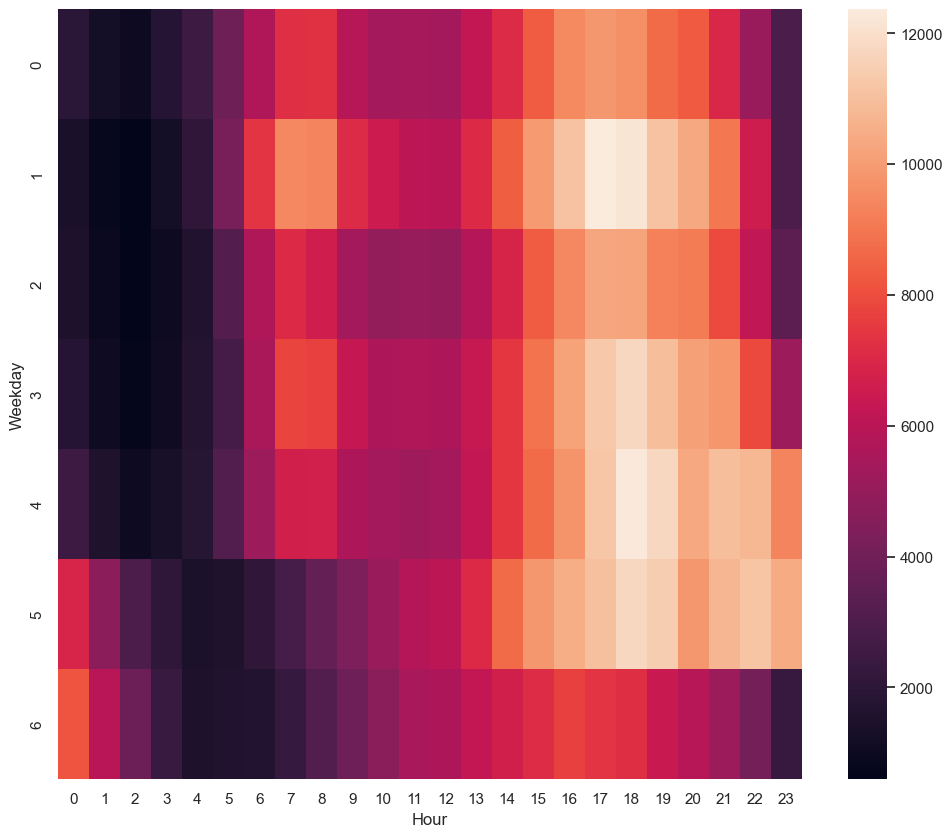

In [76]:
# Correlation of Weekday and Hour
df = df.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

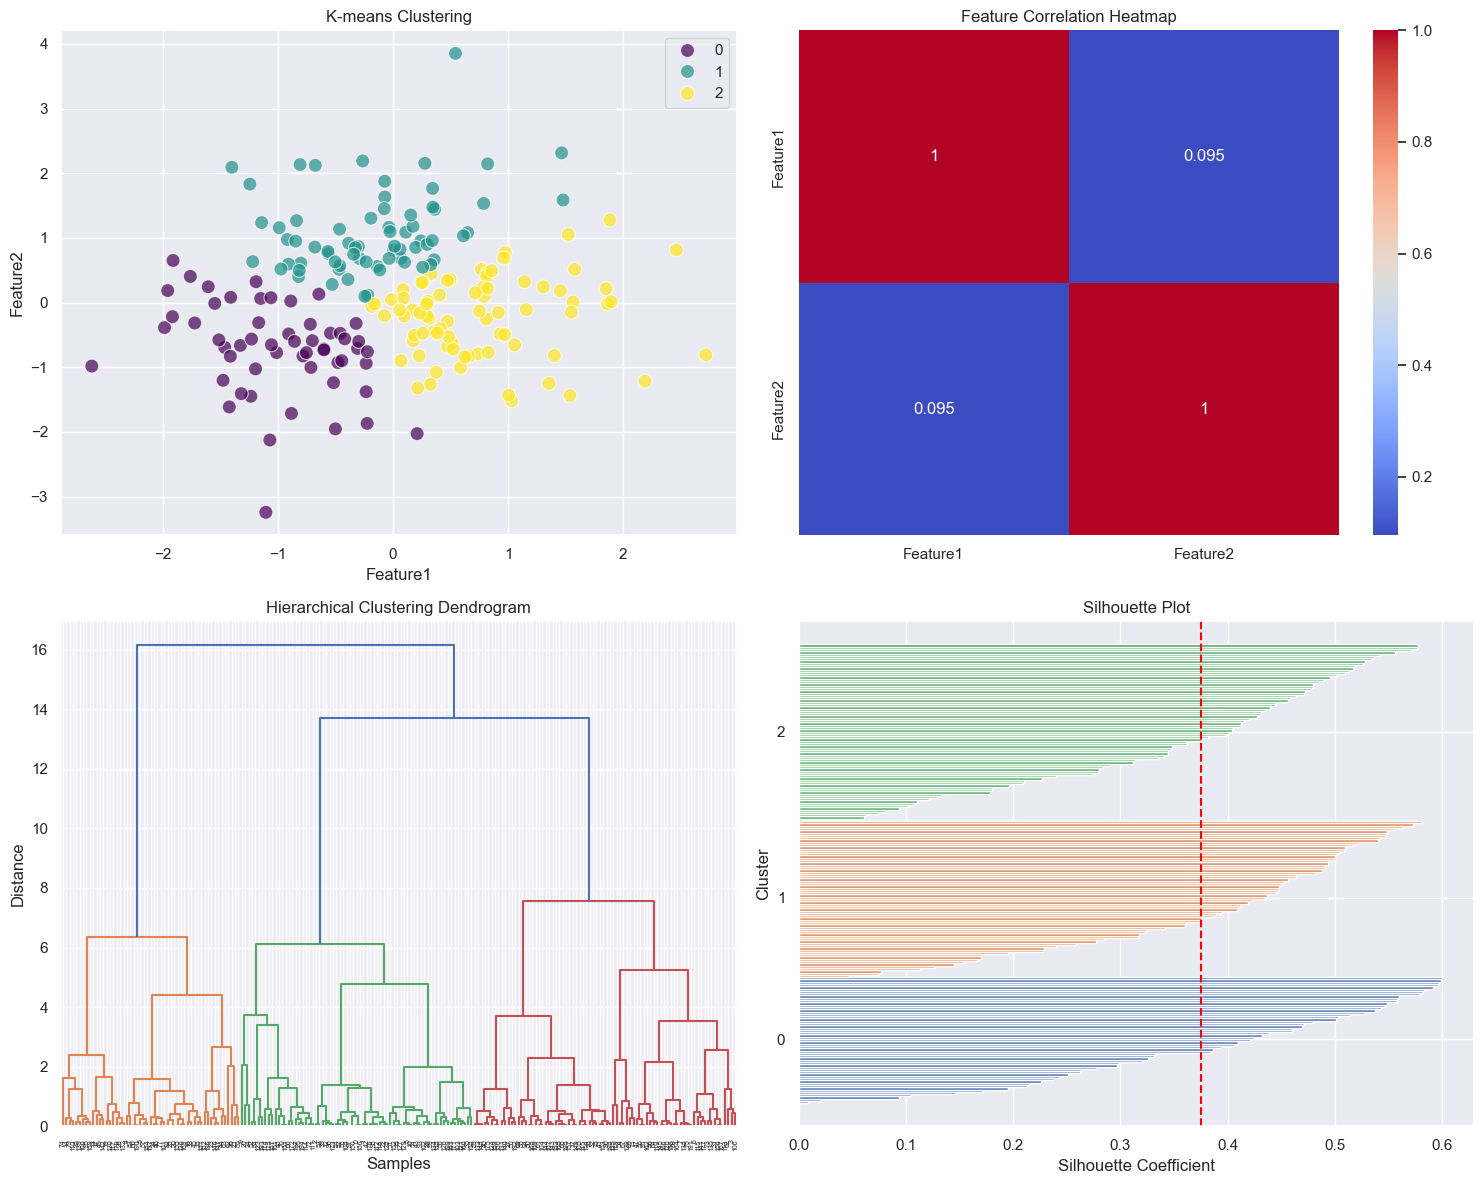

In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.randn(200),
    'Feature2': np.random.randn(200)
})

# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Hierarchical clustering
linked = linkage(scaled_df, 'ward')

# Create subplots for various visualizations
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot for K-means clusters
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue=kmeans_labels, palette='viridis', s=100, alpha=0.7, ax=axs[0, 0])
axs[0, 0].set_title('K-means Clustering')
axs[0, 0].set_xlabel('Feature1')
axs[0, 0].set_ylabel('Feature2')
axs[0, 0].grid(True)


# Heatmap for feature relationships
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Feature Correlation Heatmap')

# Dendrogram for hierarchical clustering
dendrogram(linked, ax=axs[1, 0])
axs[1, 0].set_title('Hierarchical Clustering Dendrogram')
axs[1, 0].set_xlabel('Samples')
axs[1, 0].set_ylabel('Distance')

# Silhouette plot for K-means clusters
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(scaled_df, kmeans_labels)
y_lower, y_upper = 0, 0
yticks = []
for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    axs[1, 1].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)
axs[1, 1].axvline(silhouette_vals.mean(), color="red", linestyle="--")
axs[1, 1].set_yticks(yticks)
axs[1, 1].set_yticklabels(np.unique(kmeans_labels))
axs[1, 1].set_title('Silhouette Plot')
axs[1, 1].set_xlabel('Silhouette Coefficient')
axs[1, 1].set_ylabel('Cluster')

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('./uber.png')

# Display the plot
plt.show()